In [ ]:
#Task 2: Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('Telco_Customer_Churn_Dataset  (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn Rate:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


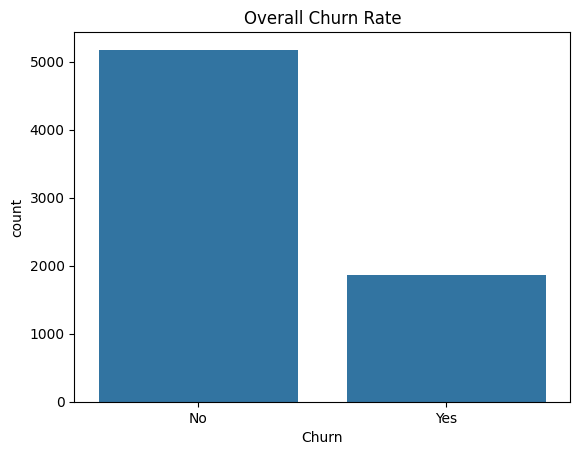

In [5]:
# 1. Calculate and visualize overall churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
print("Churn Rate:\n", churn_rate)
sns.countplot(x='Churn', data=df)
plt.title('Overall Churn Rate')
plt.show()

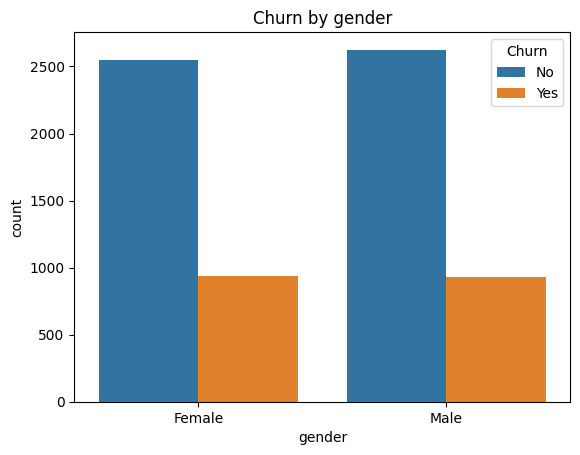

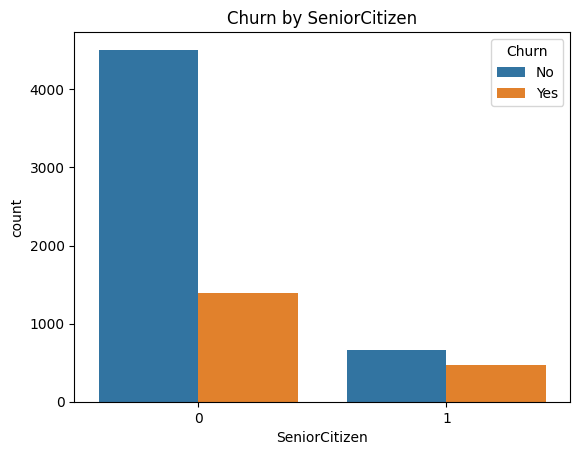

In [7]:
# 2. Explore customer distribution by demographics (e.g., gender, SeniorCitizen)
for col in ['gender', 'SeniorCitizen']:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.show()


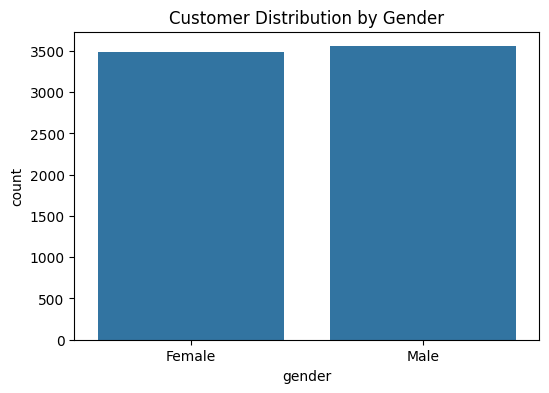

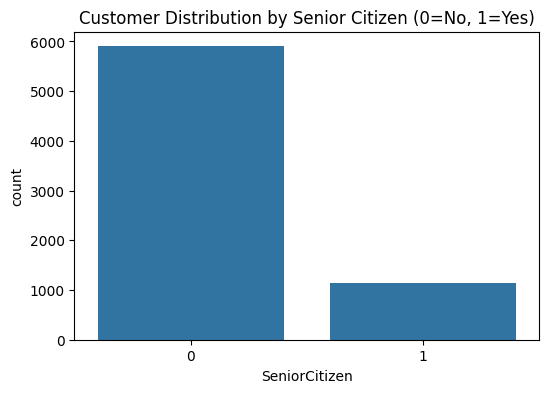

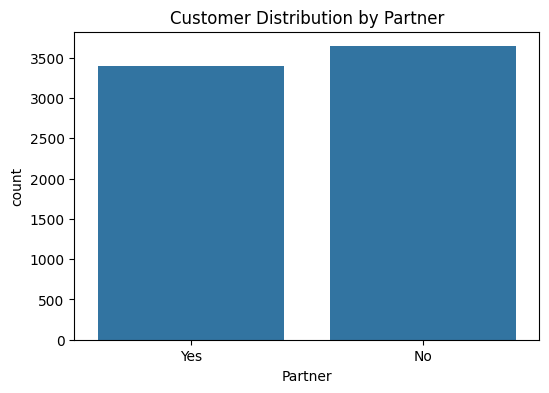

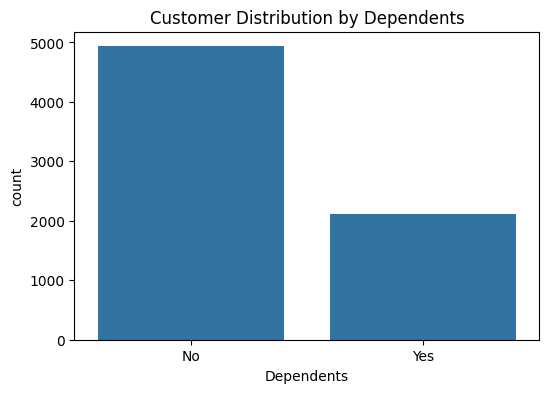

In [9]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Customer Distribution by Gender')
plt.show()

# Senior Citizen distribution
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Customer Distribution by Senior Citizen (0=No, 1=Yes)')
plt.show()

# Partner distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Partner', data=df)
plt.title('Customer Distribution by Partner')
plt.show()

# Dependents distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', data=df)
plt.title('Customer Distribution by Dependents')
plt.show()

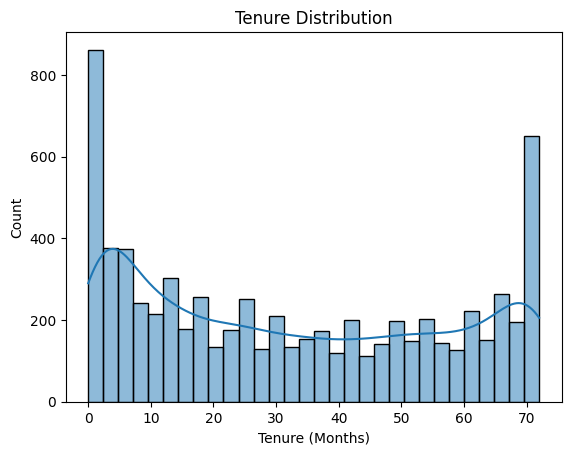

In [12]:
# 3. Analyze tenure distribution
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.show()

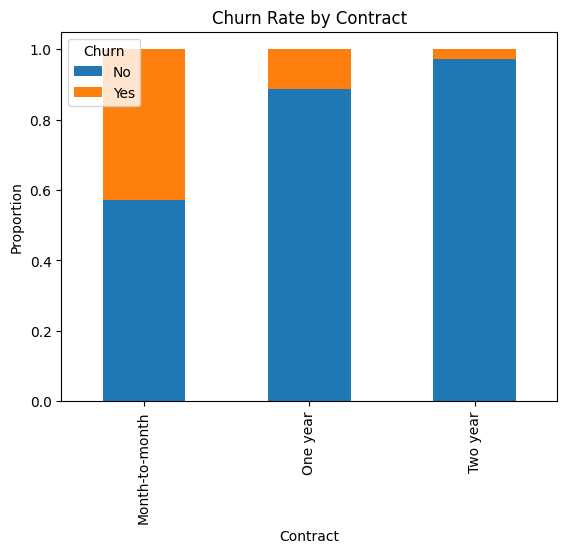

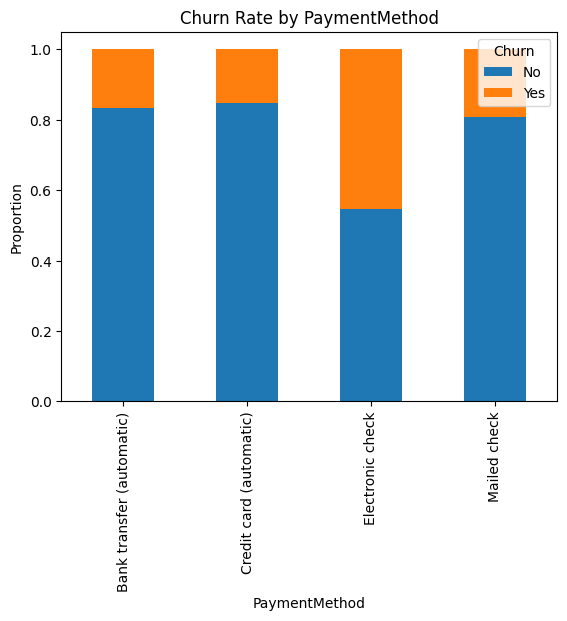

In [13]:
# 4. Investigate churn vs contract type/payment method
for col in ['Contract', 'PaymentMethod']:
    churn_by_col = pd.crosstab(df[col], df['Churn'], normalize='index')
    churn_by_col.plot(kind='bar', stacked=True)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Proportion')
    plt.show()